# Текущий контроль успеваемости 3

<a href="https://colab.research.google.com/github/dm-fedorov/python_basic/blob/master/gsom/03/Текущий_контроль_03.ipynb" target="_blank"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

Нас всюду окружает текст.

В этом Блокноте вам предстоит погрузиться в мир настоящего анализа текстовых данных. 

Успехов в этом интересном деле!

В сумме можно набрать `15 баллов`:

1) `+2 балла` за оформление Блокнота: наличие комментариев в стиле Python (после `#`) или разметки [markdown](https://www.markdownguide.org/basic-syntax/)

2) `+13 баллов` по сумме заданий

3) если загружаете позже обозначенного срока, то `-3 балла`

4) здесь напоминаю про самостоятельное выполнение работы, но вы и так это знаете.

## Задание 1 (5 балла), средний уровень

Разработайте собственный класс для работы с файлами.

Интерфейс работы с классом имеет следующий вид:

```Python
file = MyFile("text.txt", "read")
text = file.read() # происходит чтение в виде str
print(text)

file = MyFile("text.txt", "write")
text = file.write("привет!") # происходит запись строки в файл

file = MyFile("text.txt", "append")
text = file.write("привет!") # происходит добавление строки в конец файла

# указали URL
file = MyFile("https://blog.dfedorov.spb.ru", "url") 
# и может читать содержимое страницы по указанному URL
text = file.read_url() # происходит чтение в виде str
print(text)

# возвращает кол-во url адресов на странице, например, методом count 
count = file.count_urls()
print(count)

# происходит запись содержимого страницы по URL в указанный файл
file.write_url("text.txt") 
```

Выполните обработку возможных ошибок.

In [ ]:
# устанавливаем всё, что надо для 3 заданий

!pip install lxml
!pip install requests
!pip install beautifulsoup4
!pip3 install feedparser
!pip3 install pymorphy2
!pip3 install textblob

In [ ]:
import os.path
class MyFile():

  def __init__(self, t_text, parametr):
      self.t_text = t_text
      self.parametr = parametr
      
      # Если такого файла не было, создаём его
      if (os.path.exists(f'{self.t_text}') == False) and self.parametr.lower() != 'url':
        self.data = open(f'{self.t_text}', "w")
        self.data.write("В начале было слово\n")
        self.data.close()

      # если параметр равен url
      if self.parametr.lower() == 'url':
        import requests
        self.data = str(requests.get(self.t_text).text.encode("utf8"))
        self.data_split = list(requests.get(self.t_text).text.split("\n"))
        self.data_write = requests.get(self.t_text).text
    
  def read(self):
    try:

      self.data = open(f'{self.t_text}', f'{self.parametr[0].lower()}') # берём первую букву параметра и делаем её строчной
      return self.data.read()
    
    # если была ошибка в параметре, то тогда поднимается ошибка ValueError
    except ValueError:
      return (f'Параметра "{self.parametr}" не существует')
    except FileNotFoundError:
      return ("Такого файла не существует")


  def write(self, w_write):
    self.data = open(f'{self.t_text}', f'{self.parametr[0].lower()}')
    a = self.data.write(w_write)
    self.data.close()
    return a

  def read_url(self):
    return self.data

  def count_urls(self):
      count = 0
      for i in range(len(self.data_split)):
        if "https" in self.data_split[i]:
          count += 1
      return count
    
  def write_url(self, w_text):
    a = open(f'{w_text}', "w")
    a.close()
    return a


file = MyFile("text.txt", "write")
text = file.write("В начале было слово....") # происходит чтение в виде str
print('Заменили содержимое файла, количество записанных символов:\n', text)

file = MyFile("text.txt", "read")
text = file.read() # происходит чтение в виде str
print('Прочитали файл:\n', text)

file = MyFile("text.txt", "append")
text = file.write("привет!") # происходит добавление строки в конец файла
print('Приписали слова, количество записанных символов::\n', text)

try:
  file = MyFile("https://blog.dfedorov.spb.ru", "url") # чтение содержимого страницы по указанному URL
  text = file.read_url() # происходит чтение в виде str
  print(text)

  # возвращает кол-во url адресов на странице, например, методом count
  count = file.count_urls()
  print(count)

  # происходит запись содержимого страницы по URL в указанный файл
  file.write_url("text.txt")
except AttributeError:
  print(f"Нечитабельная ссылка, проверьте, пожалуйста, значение")


## Задание 2 (5 баллов), средний уровень

1) Исследовать эмоциональную окраску новостей на *английском языке* (рекомендую модули `feedparser` и `textblob` - хорошо работает для англ. языка). 

2) Определите наиболее часто встречающиеся слова в тексте новости *на русском языке* за выбранный период (рекомендую модуль `pymorphy2`, использовать [начальную форму](https://pymorphy2.readthedocs.io/en/stable/user/guide.html#normalization) и [убрать союзы](https://pymorphy2.readthedocs.io/en/stable/user/grammemes.html) / в качестве альтернативы можно использовать [модуль nltk](https://habr.com/ru/post/517410/)).

3) Постройте график распределения слов в новости *на русском языке* (рекомендую модуль [word_cloud](https://github.com/amueller/word_cloud))

In [ ]:
# импортируем модули
!pip3 install feedparser
!pip3 install pymorphy2
!pip3 install textblob
import pymorphy2
import textblob
import requests

In [ ]:
# Первое подзадание
import feedparser
from textblob import TextBlob

# парсим новости c NY Times
parse_news_NY = feedparser.parse("https://rss.nytimes.com/services/xml/rss/nyt/Sports.xml")

# объявляем переменные
count = 0
list_news = []

# циклом выводим эмоциональную окраску
while True:
  try:
    count += 1
    print(f"Sentiment Polarity of the {count} article =", round(TextBlob(parse_news_NY["entries"][count]["title"]).sentiment.polarity, 2))
  except IndexError:
    break


In [ ]:
# второе подзадание

# импортируем модули
import feedparser
import pymorphy2
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import skimage
from skimage import io

# объявляем необходимые переменные
morph, words, all_words, count, text = pymorphy2.MorphAnalyzer(), [], [], 0, ''

# парсим новости
parse_news = feedparser.parse("http://static.feed.rbc.ru/rbc/logical/footer/news.rss")

# берем только слова из статьи РБК
while True:
  try:
    count += 1
    words.append(parse_news['entries'][count]['summary'].split(" "))
  except:
    break

for i in range(len(words)):
  for j in range(len(words[i])):
    # убираем ненужные символы и приводим слова в "нормальную форму"
    words[i][j] = words[i][j].replace('.','').replace('?','').replace('?','').replace('!','').replace(',','').replace(':','').replace(';','').replace('—','')
    words[i][j] = morph.parse(words[i][j])[0].normal_form
    
    # проверяем на то, что слова не предлоги, союзы, местоимения, частица, и то, что это не пустое значение
    if morph.parse(words[i][j])[0].tag.POS not in ["CONJ", "PREP", "NPRO", "PRCL"] and words[i][j] != '':
      all_words.append(words[i][j]) # создаём новый список со словами
      text = text + " " + words[i][j]

print(Counter(all_words).most_common())

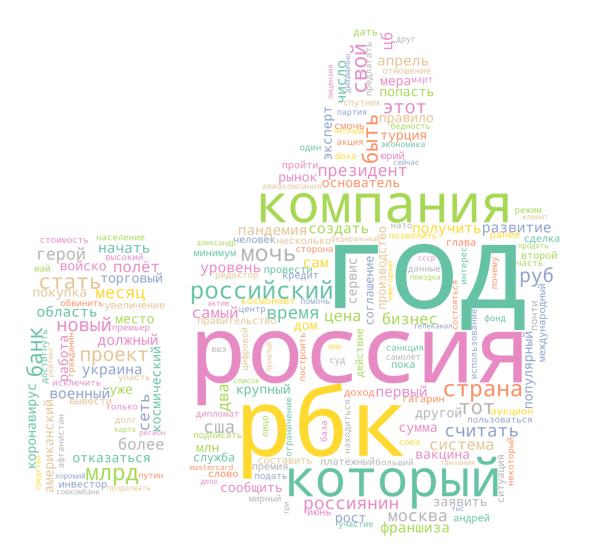

In [ ]:
# третье подзадание

# Создаём маску (поле) для WordCloud
image_numpy = skimage.io.imread("https://www.der-kleine-preis.de/landingpage/berbel/img/Daumen_hoch_bmp.png")
mask = np.array(image_numpy) # Импортируем картинку в Массив np

# Генерируем WordCloud
wordcloud = WordCloud(width = 1000, height = 750, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(text)
plt.figure(figsize=(20, 10)) #определяем размер картинки
plt.imshow(wordcloud) #рисуем WordCloud
plt.axis("off"); #убираем оси

## Задание 3 (3 балла), hard уровень

Для [файла](http://dfedorov.spb.ru/python3/forecast.html), расположенного в сети Интернет, напишите программу с использованием модуля `Beautiful Soup`, которая извлекает данные из HTML-страницы и сохраняет их в файле формата CSV (подсказка [тут](https://colab.research.google.com/github/dm-fedorov/python_basic/blob/master/task_parsing_html.ipynb)).

In [ ]:
# импортируем необходимые библиотеки 
import bs4
import urllib.request
import csv

# объявляем переменные
headings_csv, text_csv = [], []

# открываем ссылку с urllib
with urllib.request.urlopen("http://dfedorov.spb.ru/python3/forecast.html") as webpage:
  bs = bs4.BeautifulSoup(webpage.read().decode('utf-8'), 'html.parser') # читаем код

for i in range(len(str(bs.select('.forecast-label')).split("</div>"))-1):
  headings_csv.append(bs.select('.forecast-label')[i].text) # импортируем жирные заголовки
  text_csv.append(bs.select('.forecast-text')[i].text) # импортируем текст

# создаём шапку таблицы
headings_csv.insert(0, 'Время') 
text_csv.insert(0, 'Погода')

# записываем в some.csv данные
with open('some.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(zip(headings_csv, text_csv))  

# читаем some.csv 
with open('some.csv', 'r') as f:
    print(list(csv.reader(f)))

[['Время', 'Погода'], ['Сегодня ночью', 'Небольшая вероятность ливней и гроз до 22:00. Облачно с прояснениями около 66. Ветер юго-западный около 9 миль в час. Вероятность осадков 20%. Возможны новые осадки от десятой до четверти дюйма.'], ['Пятница', 'Местами солнечно. Высоко около 77, с температурами, падающими приблизительно к 75 днем. Северо-западный ветер от 7 до 12 миль в час, с порывами до 18 миль в час.'], ['Ночь пятницы', 'Облачно с прояснениями около 63. Северный ветер от 7 до 10 миль в час.'], ['Суббота', 'В основном солнечно, с высокой температурой около 73. Северный ветер около 10 миль в час.'], ['Субботняя ночь', 'Облачно с прояснениями, около 63. Ветер северный, 5-10 миль в час.'], ['Воскресенье', 'В основном солнечно, с высотой около 73.'], ['Воскресный вечер', 'Облачно с прояснениями около 64.'], ['Понедельник', 'Преимущественно солнечно, с высоким около 74.'], ['Ночь понедельника', 'В основном ясно, с низким около 65.'], ['Вторник', 'Солнечный, с высоким около 75.'], [